In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
volve = pd.read_csv('vpd.csv')

In [3]:
volve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15634 non-null  object 
 1   NPD_WELL_BORE_CODE        15634 non-null  int64  
 2   NPD_WELL_BORE_NAME        15634 non-null  object 
 3   ON_STREAM_HRS             15349 non-null  float64
 4   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 5   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 6   AVG_DP_TUBING             8980 non-null   float64
 7   AVG_ANNULUS_PRESS         7890 non-null   float64
 8   AVG_CHOKE_SIZE_P          8919 non-null   float64
 9   AVG_CHOKE_UOM             9161 non-null   object 
 10  AVG_WHP_P                 9155 non-null   float64
 11  AVG_WHT_P                 9146 non-null   float64
 12  DP_CHOKE_SIZE             15340 non-null  float64
 13  BORE_OIL_VOL              9161 non-null   float64
 14  BORE_G

In [4]:
volve = volve[(volve['NPD_WELL_BORE_NAME'] != '15/9-F-5') & (volve['NPD_WELL_BORE_NAME'] != '15/9-F-4')]


In [5]:
volve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9001 entries, 0 to 9000
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   9001 non-null   object 
 1   NPD_WELL_BORE_CODE        9001 non-null   int64  
 2   NPD_WELL_BORE_NAME        9001 non-null   object 
 3   ON_STREAM_HRS             9001 non-null   float64
 4   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 5   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 6   AVG_DP_TUBING             8980 non-null   float64
 7   AVG_ANNULUS_PRESS         7730 non-null   float64
 8   AVG_CHOKE_SIZE_P          8759 non-null   float64
 9   AVG_CHOKE_UOM             9001 non-null   object 
 10  AVG_WHP_P                 8995 non-null   float64
 11  AVG_WHT_P                 8995 non-null   float64
 12  DP_CHOKE_SIZE             8995 non-null   float64
 13  BORE_OIL_VOL              9001 non-null   float64
 14  BORE_GAS

C:\Users\acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Before Outlier Removal')

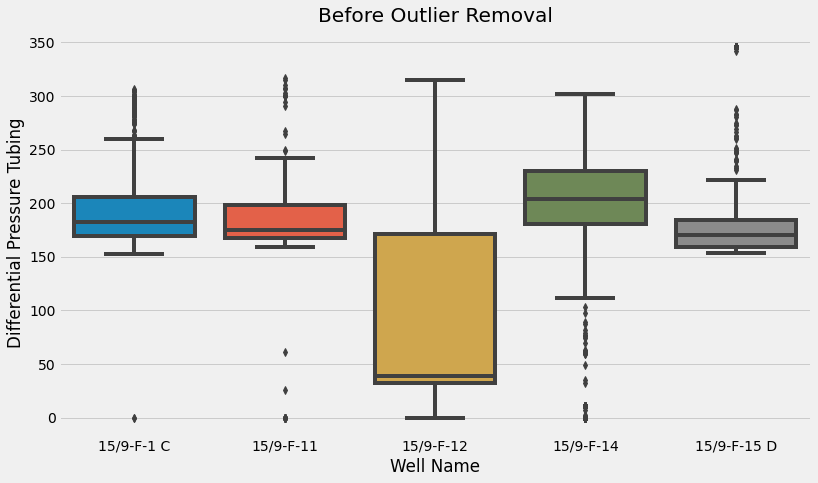

In [115]:
#sns.boxplot('NPD_WELL_BORE_CODE', y = 'AVG_DP_TUBING')
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,7))
plt.grid(True)
sns.boxplot(volve['NPD_WELL_BORE_NAME'],volve['AVG_DP_TUBING'])
plt.xlabel('Well Name')
plt.ylabel('Differential Pressure Tubing')
plt.title('Before Outlier Removal')

In [7]:
a = list(volve['NPD_WELL_BORE_NAME'].unique())


In [103]:
IQR = []
q1 = []
q3 = []
Md =[]
for i in a:
    d = volve[volve['NPD_WELL_BORE_NAME'] == i].describe()['AVG_DP_TUBING'].to_dict()
    iqr = d['75%'] - d['25%']
    IQR.append(iqr)
    md = d['50%']
    p = d['75%']
    q = d['25%']
    Md.append(md)
    q1.append(q)
    q3.append(p)
stat = pd.DataFrame({'Well name':a,'1st quantile':q1,'3rd quantile':q3,'Interquantile Range':IQR,'Median':Md})

In [104]:
volve[volve['NPD_WELL_BORE_NAME'] == '15/9-F-1 C' ].describe()['AVG_DP_TUBING']

count    743.000000
mean     192.540223
std       36.106025
min        0.000000
25%      169.370000
50%      182.850000
75%      205.631000
max      305.976000
Name: AVG_DP_TUBING, dtype: float64

In [105]:
stat['Upper range for outlier'] = stat['3rd quantile'] + 1.5*stat['Interquantile Range']
stat['Lower range for outlier'] = stat['1st quantile'] - 1.5*stat['Interquantile Range']
stat

,Well name,1st quantile,3rd quantile,Interquantile Range,Median,Upper range for outlier,Lower range for outlier
0,15/9-F-1 C,169.37000,205.63100,36.26100,182.8500,260.022500,114.978500
1,15/9-F-11,167.75750,198.36650,30.60900,175.1030,244.280000,121.844000
2,15/9-F-12,32.45450,171.19000,138.73550,38.7215,379.293250,-175.648750
3,15/9-F-14,180.74950,229.63275,48.88325,204.2475,302.957625,107.424625
4,15/9-F-15 D,159.35825,184.56475,25.20650,170.3940,222.374500,121.548500


In [92]:
stat['Upper range for outlier'][0]

260.0225

In [93]:
i ='15/9-F-1 C'
df1 = volve[volve['NPD_WELL_BORE_NAME'] == i][['NPD_WELL_BORE_NAME','AVG_DP_TUBING']]

In [94]:
df1.shape

(746, 2)

In [95]:
i ='15/9-F-11'
df2 = volve[volve['NPD_WELL_BORE_NAME'] == i][['NPD_WELL_BORE_NAME','AVG_DP_TUBING']]

In [96]:
i ='15/9-F-12'
df3 = volve[volve['NPD_WELL_BORE_NAME'] == i][['NPD_WELL_BORE_NAME','AVG_DP_TUBING']]

In [97]:
i ='15/9-F-14'
df4 = volve[volve['NPD_WELL_BORE_NAME'] == i][['NPD_WELL_BORE_NAME','AVG_DP_TUBING']]

In [98]:
i ='15/9-F-15 D'
df5 = volve[volve['NPD_WELL_BORE_NAME'] == i][['NPD_WELL_BORE_NAME','AVG_DP_TUBING']]

In [99]:
df11 = df1[(df1['AVG_DP_TUBING']<stat['Upper range for outlier'][0]) & 
           (df1['AVG_DP_TUBING']>stat['Lower range for outlier'][0])  ]

In [100]:
df11 = df1[(df1['AVG_DP_TUBING']<235) & 
           (df1['AVG_DP_TUBING']>stat['Lower range for outlier'][0])  ]

In [101]:
df11.shape

(654, 2)

C:\Users\acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NPD_WELL_BORE_NAME', ylabel='AVG_DP_TUBING'>

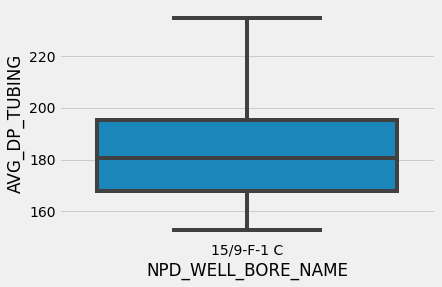

In [102]:
sns.boxplot(df11['NPD_WELL_BORE_NAME'],df11['AVG_DP_TUBING'])

In [48]:
df22 = df2[(df2['AVG_DP_TUBING']<stat['Upper range for outlier'][1]) & 
           (df2['AVG_DP_TUBING']>stat['Lower range for outlier'][1])]

C:\Users\acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NPD_WELL_BORE_NAME', ylabel='AVG_DP_TUBING'>

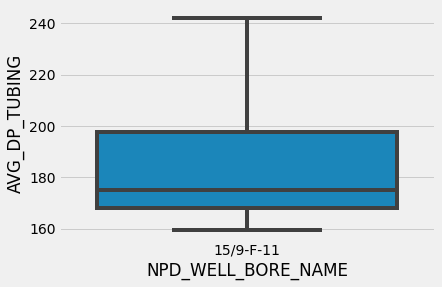

In [49]:
sns.boxplot(df22['NPD_WELL_BORE_NAME'],df22['AVG_DP_TUBING'])

C:\Users\acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NPD_WELL_BORE_NAME', ylabel='AVG_DP_TUBING'>

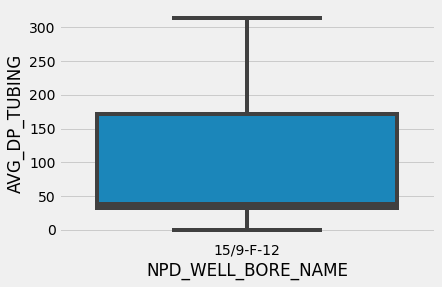

In [50]:
df33 = df3[(df3['AVG_DP_TUBING']<stat['Upper range for outlier'][2]) & 
           (df3['AVG_DP_TUBING']>stat['Lower range for outlier'][2])]
sns.boxplot(df33['NPD_WELL_BORE_NAME'],df33['AVG_DP_TUBING'])

C:\Users\acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NPD_WELL_BORE_NAME', ylabel='AVG_DP_TUBING'>

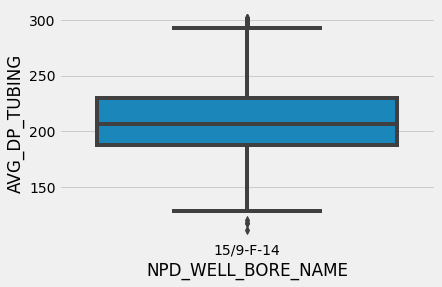

In [51]:
df44 = df4[(df4['AVG_DP_TUBING']<stat['Upper range for outlier'][3]) & 
           (df4['AVG_DP_TUBING']>stat['Lower range for outlier'][3])]
sns.boxplot(df44['NPD_WELL_BORE_NAME'],df44['AVG_DP_TUBING'])

C:\Users\acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NPD_WELL_BORE_NAME', ylabel='AVG_DP_TUBING'>

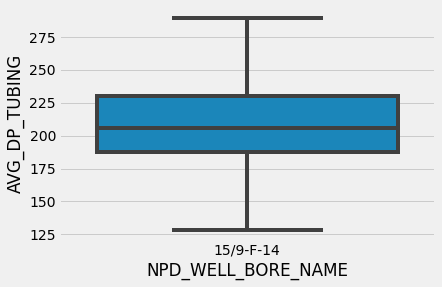

In [53]:
df44 = df4[(df4['AVG_DP_TUBING']<290) & 
           (df4['AVG_DP_TUBING']>122)]
sns.boxplot(df44['NPD_WELL_BORE_NAME'],df44['AVG_DP_TUBING'])

C:\Users\acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NPD_WELL_BORE_NAME', ylabel='AVG_DP_TUBING'>

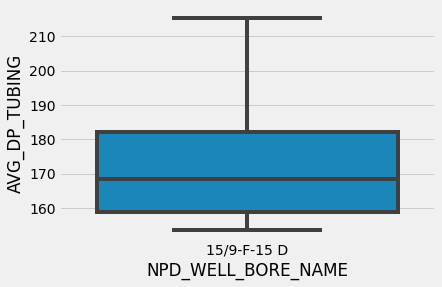

In [58]:
df55 = df5[(df5['AVG_DP_TUBING']<221) & 
           (df5['AVG_DP_TUBING']>stat['Lower range for outlier'][4])]
sns.boxplot(df55['NPD_WELL_BORE_NAME'],df55['AVG_DP_TUBING'])

## Replacing Outliers with medians

In [108]:
#df2["DP C"] = np.where(df["Age"] >75, median,df['Age'])
df2['AVG_DP_TUBING'] = np.where((df2['AVG_DP_TUBING']>stat['Upper range for outlier'][1]) | 
                       (df2['AVG_DP_TUBING']<stat['Lower range for outlier'][1]),stat['Median'][1],df2['AVG_DP_TUBING'])

C:\Users\acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NPD_WELL_BORE_NAME', ylabel='AVG_DP_TUBING'>

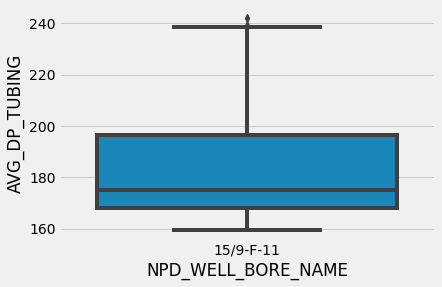

In [110]:
sns.boxplot(df2['NPD_WELL_BORE_NAME'],df2['AVG_DP_TUBING'])

## Merged DataFrame

In [111]:
fdf = pd.concat([df11, df22,df33, df44,df55], ignore_index=True)

In [112]:
fdf

,NPD_WELL_BORE_NAME,AVG_DP_TUBING
0,15/9-F-1 C,204.795
1,15/9-F-1 C,182.059
2,15/9-F-1 C,171.053
3,15/9-F-1 C,168.242
4,15/9-F-1 C,165.539
...,...,...
8487,15/9-F-15 D,179.171
8488,15/9-F-15 D,179.204
8489,15/9-F-15 D,178.615
8490,15/9-F-15 D,179.599


C:\Users\acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'After Outlier Removal')

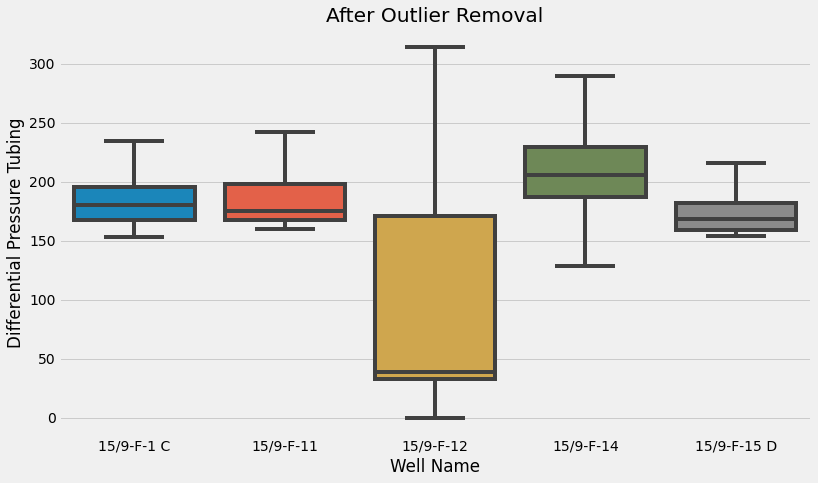

In [117]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,7))
plt.grid(True)
sns.boxplot(fdf['NPD_WELL_BORE_NAME'],fdf['AVG_DP_TUBING'])
plt.xlabel('Well Name')
plt.ylabel('Differential Pressure Tubing')
plt.title('After Outlier Removal')

In [114]:
'Outliers Removed'.center(50,'*')

'*****************Outliers Removed*****************'

# ##